In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Read data for analysis
df=pd.read_csv('C:\\Users\\User\\Desktop\\Financial Data specialist\\GIT AND GITHUB\\AGRI-CREDIT ASSESMENT MODEL\\DATA\\east_africa_credit_with_NaN1.csv')

In [36]:
column=df.columns.unique()
column


Index(['farmer_id', 'country', 'age', 'gender', 'education_level',
       'household_size', 'marital_status', 'dependents', 'mobile_provider',
       'months_as_mobile_user', 'has_smartphone', 'avg_monthly_transactions',
       'total_transaction_volume_6mo_usd', 'avg_account_balance_usd',
       'has_mobile_savings', 'previous_loan_repaid',
       'airtime_purchases_monthly', 'bill_payment_consistency',
       'p2p_transfers_monthly', 'farm_size_acres', 'farming_experience_years',
       'primary_crop', 'crop_diversity_count', 'cattle_count', 'goats_count',
       'chickens_count', 'total_livestock_tlu', 'land_ownership',
       'has_irrigation', 'uses_improved_seeds', 'fertilizer_kg_per_acre',
       'previous_yield_bags', 'has_off_farm_income',
       'received_extension_services', 'cooperative_member',
       'has_buyer_contract', 'ndvi_current', 'ndvi_historical_avg',
       'ndvi_trend', 'satellite_visible_area_pct', 'soil_moisture_index',
       'annual_rainfall_mm', 'distance_t

In [ ]:
df.corr(numeric_only=True)['default_probability'].sort_values()



has_buyer_contract                 -0.316074
cooperative_member                 -0.307116
previous_loan_repaid               -0.259447
has_irrigation                     -0.224164
has_crop_insurance                 -0.214351
uses_improved_seeds                -0.211079
ndvi_current                       -0.210459
bill_payment_consistency           -0.173498
ndvi_historical_avg                -0.168330
has_off_farm_income                -0.152241
months_as_mobile_user              -0.137274
age                                -0.129055
avg_account_balance_usd            -0.128337
farming_experience_years           -0.110933
total_transaction_volume_6mo_usd   -0.109984
soil_moisture_index                -0.106379
years_in_location                  -0.098187
previous_yield_bags                -0.086183
farm_size_acres                    -0.079201
has_trade_credit_history           -0.078085
has_mobile_savings                 -0.075069
road_quality_score                 -0.065058
available_

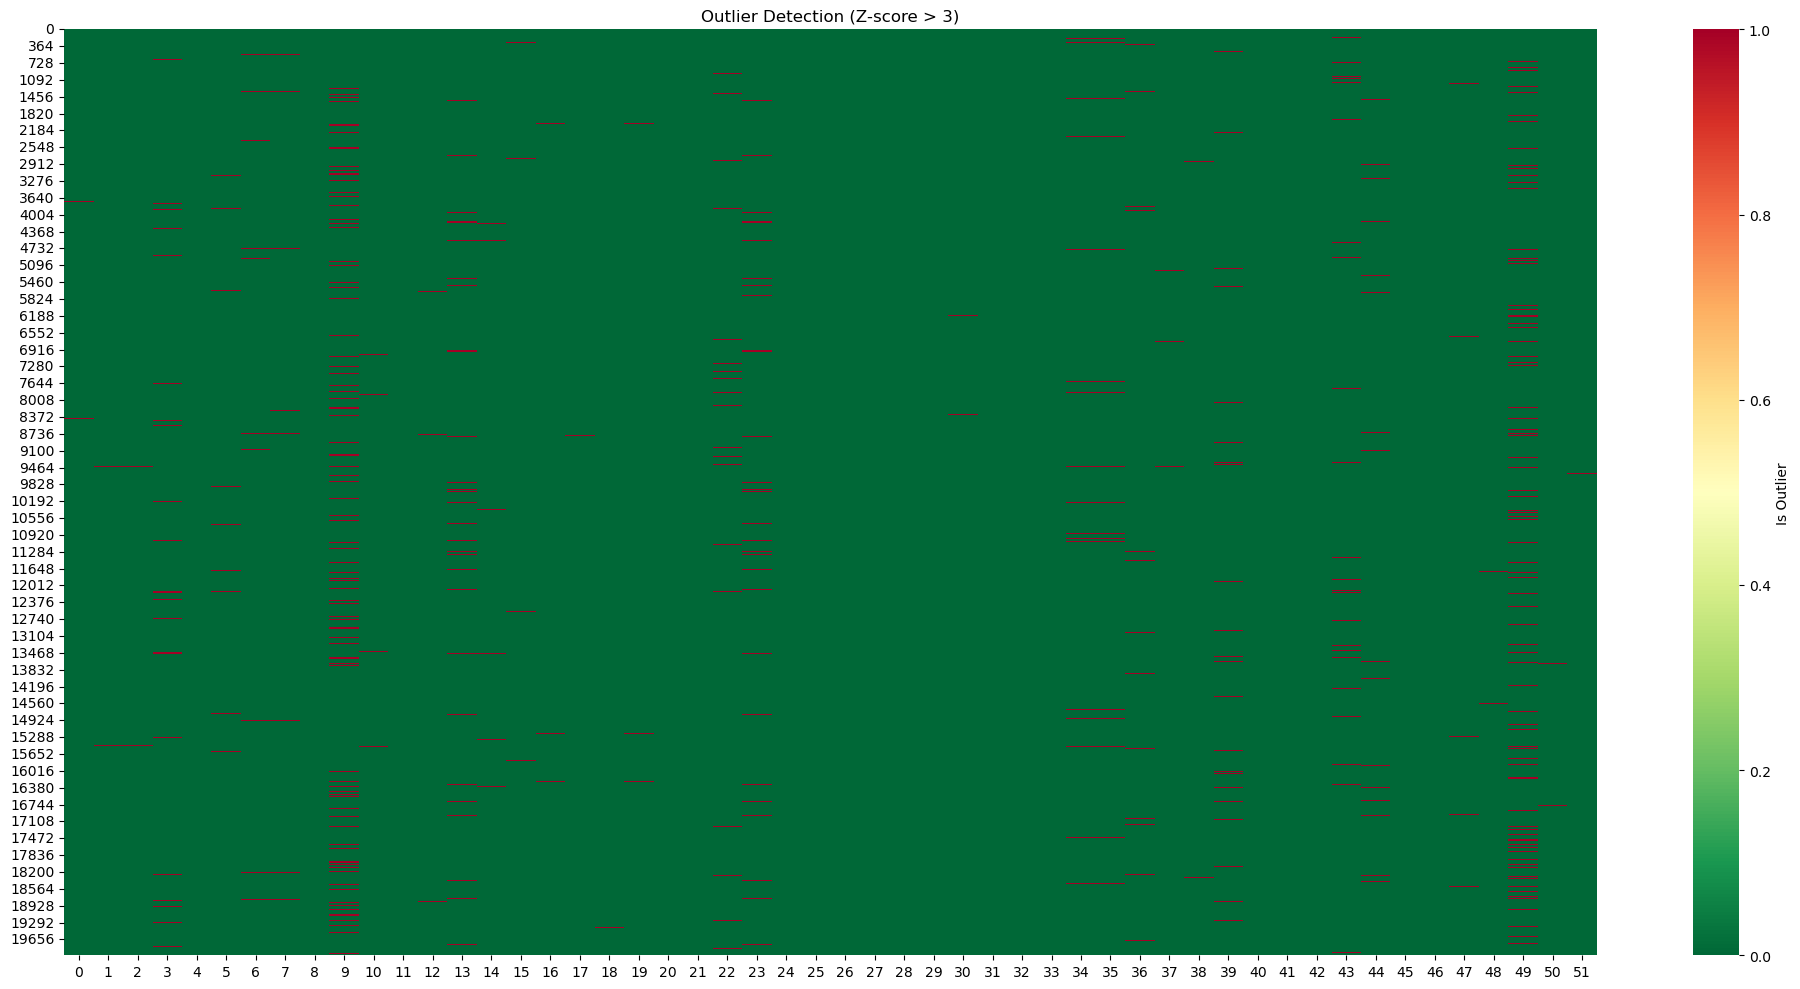

In [63]:
from scipy import stats

# Calculate z-scores for all numeric columns
numeric_df = df.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_df, nan_policy='omit'))

# Visualize where z-scores > 3 (common outlier threshold)
plt.figure(figsize=(20, 10))
sns.heatmap(z_scores > 3, cmap='RdYlGn_r', cbar_kws={'label': 'Is Outlier'})
plt.title('Outlier Detection (Z-score > 3)')
plt.tight_layout()
plt.show()


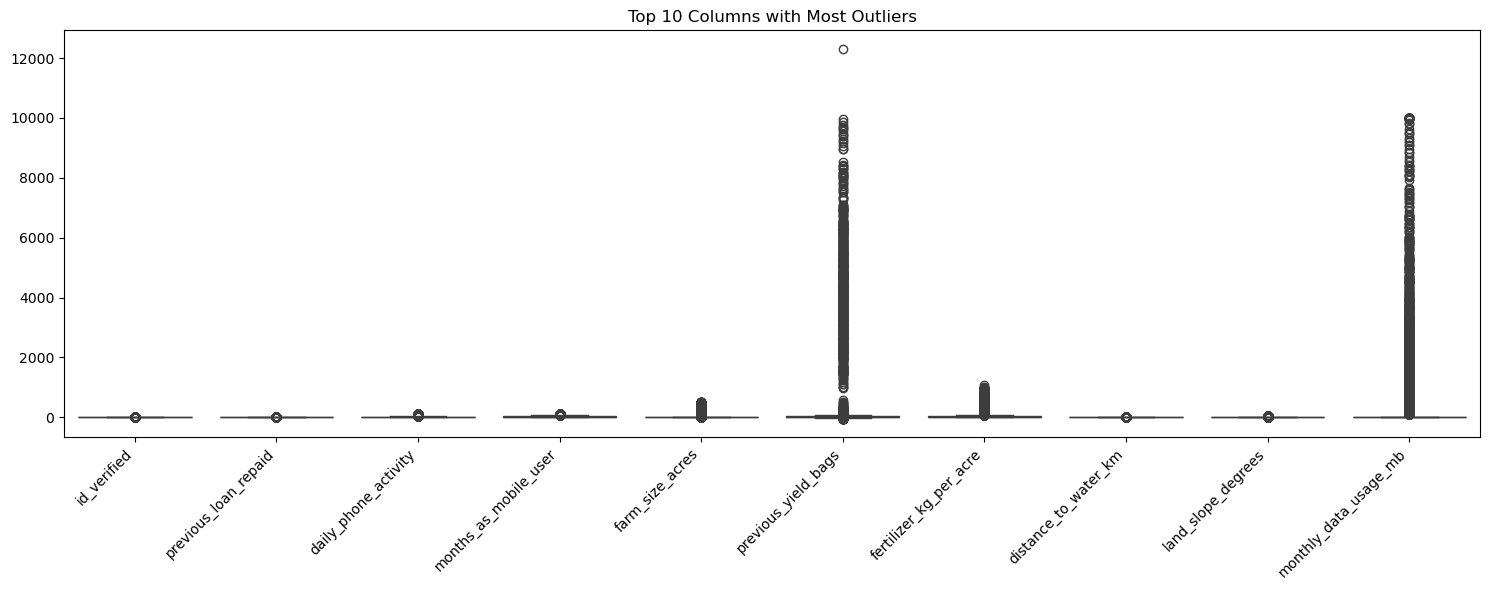

Outlier counts per column:
id_verified               1810
previous_loan_repaid      1736
daily_phone_activity       503
months_as_mobile_user      502
farm_size_acres            500
previous_yield_bags        475
fertilizer_kg_per_acre     408
distance_to_water_km       388
land_slope_degrees         377
monthly_data_usage_mb      358
dtype: int64


In [64]:
from scipy import stats
import numpy as np
import pandas as pd

# Calculate z-scores
numeric_df = df.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_df, nan_policy='omit'))

# Count outliers per column and convert to Series
outlier_counts = pd.Series(
    (z_scores > 3).sum(axis=0), 
    index=numeric_df.columns
)

# Get top 10 columns with most outliers
top_outlier_cols = outlier_counts.nlargest(10).index

plt.figure(figsize=(15, 6))
sns.boxplot(data=df[top_outlier_cols])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Columns with Most Outliers')
plt.tight_layout()
plt.show()

# Print the counts
print("Outlier counts per column:")
print(outlier_counts.sort_values(ascending=False).head(10))

Value counts for previous_loan_repaid:
previous_loan_repaid
1.0    16025
0.0     1736
Name: count, dtype: int64

Default probability by previous loan repayment:
                          mean  count
previous_loan_repaid                 
0.0                   0.569659   1736
1.0                   0.502076  16025


C:\Users\User\AppData\Local\Temp\ipykernel_27248\1972295984.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Not Repaid (0)', 'Repaid (1)'])


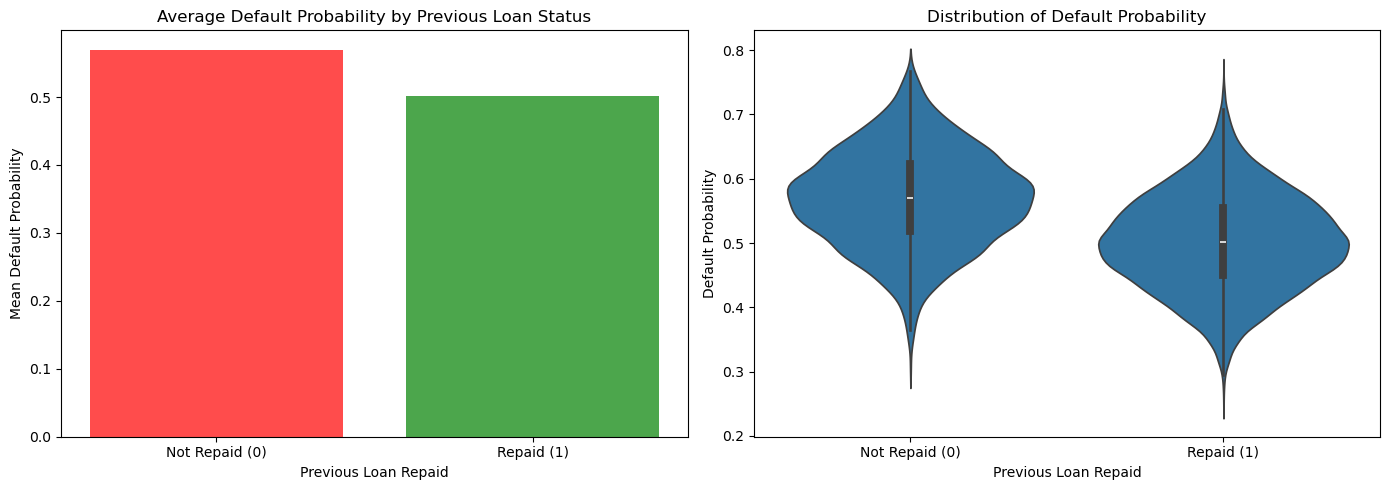

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check value counts
print("Value counts for previous_loan_repaid:")
print(df['previous_loan_repaid'].value_counts())

# Calculate mean default probability for each group
default_rates = df.groupby('previous_loan_repaid')['default_probability'].agg(['mean', 'count'])
print("\nDefault probability by previous loan repayment:")
print(default_rates)

# Better visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Bar chart of mean default probability
axes[0].bar([0, 1], default_rates['mean'], color=['red', 'green'], alpha=0.7)
axes[0].set_xlabel('Previous Loan Repaid')
axes[0].set_ylabel('Mean Default Probability')
axes[0].set_title('Average Default Probability by Previous Loan Status')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Not Repaid (0)', 'Repaid (1)'])

# Plot 2: Violin plot to see distribution
sns.violinplot(x='previous_loan_repaid', y='default_probability', data=df, ax=axes[1])
axes[1].set_xlabel('Previous Loan Repaid')
axes[1].set_ylabel('Default Probability')
axes[1].set_title('Distribution of Default Probability')
axes[1].set_xticklabels(['Not Repaid (0)', 'Repaid (1)'])

plt.tight_layout()
plt.show()

In [74]:
# Dropping columns with correlation |r|<0.05

df_filtered = df[df.corr(numeric_only=True)['default_probability'].abs()[
    df.corr(numeric_only=True)['default_probability'].abs() > 0.05
].index.tolist()]

In [81]:
df_filtered.isnull().sum()


age                                    0
months_as_mobile_user                  0
total_transaction_volume_6mo_usd    4542
avg_account_balance_usd             4542
has_mobile_savings                     0
previous_loan_repaid                2239
bill_payment_consistency               0
farm_size_acres                      274
farming_experience_years               0
has_irrigation                         0
uses_improved_seeds                    0
previous_yield_bags                    0
has_off_farm_income                    0
cooperative_member                     0
has_buyer_contract                     0
ndvi_current                        2846
ndvi_historical_avg                 2876
soil_moisture_index                 2675
distance_to_market_km                292
distance_to_input_dealer_km          292
road_quality_score                  3036
available_references                   0
has_trade_credit_history            6188
has_crop_insurance                     0
years_in_locatio

In [82]:
def percent_missing(df):
    percent_nan=100*df.isnull().sum()/len(df)
    percent_nan=percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [83]:
percent_nan=percent_missing(df_filtered)
                            

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'farm_size_acres'),
  Text(1, 0, 'distance_to_market_km'),
  Text(2, 0, 'distance_to_input_dealer_km'),
  Text(3, 0, 'previous_loan_repaid'),
  Text(4, 0, 'soil_moisture_index'),
  Text(5, 0, 'ndvi_current'),
  Text(6, 0, 'ndvi_historical_avg'),
  Text(7, 0, 'road_quality_score'),
  Text(8, 0, 'avg_account_balance_usd'),
  Text(9, 0, 'total_transaction_volume_6mo_usd'),
  Text(10, 0, 'has_trade_credit_history')])

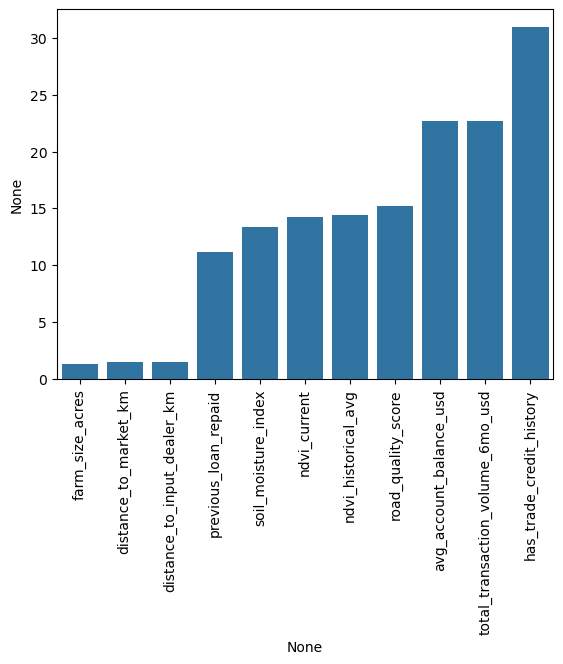

In [84]:
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [100]:
#If loan_default = 0 (no default) AND has_trade_credit_history = NaN → Fill with 1 (yes, has trade history) and vice-versa
df_filtered['has_trade_credit_history'] = np.where(
    df_filtered['has_trade_credit_history'].isna() & (df_filtered['loan_default'] == 0),
    1,  # If NaN and loan_default=0, fill with 1
    np.where(
        df_filtered['has_trade_credit_history'].isna() & (df_filtered['loan_default'] == 1),
        0,  # If NaN and loan_default=1, fill with 0
        df_filtered['has_trade_credit_history']  # Otherwise keep original value
    )
)

C:\Users\User\AppData\Local\Temp\ipykernel_27248\1542740285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['has_trade_credit_history'] = np.where(


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'farm_size_acres'),
  Text(1, 0, 'distance_to_market_km'),
  Text(2, 0, 'distance_to_input_dealer_km'),
  Text(3, 0, 'previous_loan_repaid'),
  Text(4, 0, 'soil_moisture_index'),
  Text(5, 0, 'ndvi_current'),
  Text(6, 0, 'ndvi_historical_avg'),
  Text(7, 0, 'road_quality_score'),
  Text(8, 0, 'avg_account_balance_usd'),
  Text(9, 0, 'total_transaction_volume_6mo_usd')])

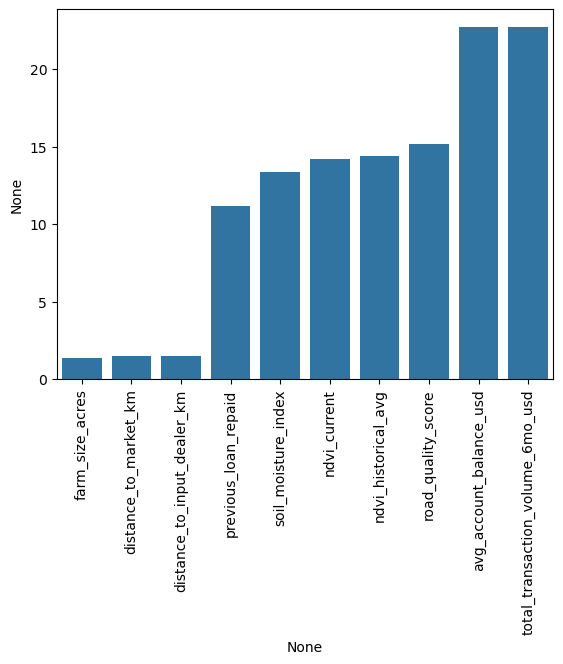

In [101]:
percent_nan=percent_missing(df_filtered)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

Correlations with total_transaction_volume_6_mon_usd:
                                  total_transaction_volume_6mo_usd  \
total_transaction_volume_6mo_usd                          1.000000   
avg_account_balance_usd                                   0.908267   
months_as_mobile_user                                    -0.006821   

                                  avg_account_balance_usd  \
total_transaction_volume_6mo_usd                 0.908267   
avg_account_balance_usd                          1.000000   
months_as_mobile_user                           -0.008316   

                                  months_as_mobile_user  
total_transaction_volume_6mo_usd              -0.006821  
avg_account_balance_usd                       -0.008316  
months_as_mobile_user                          1.000000  


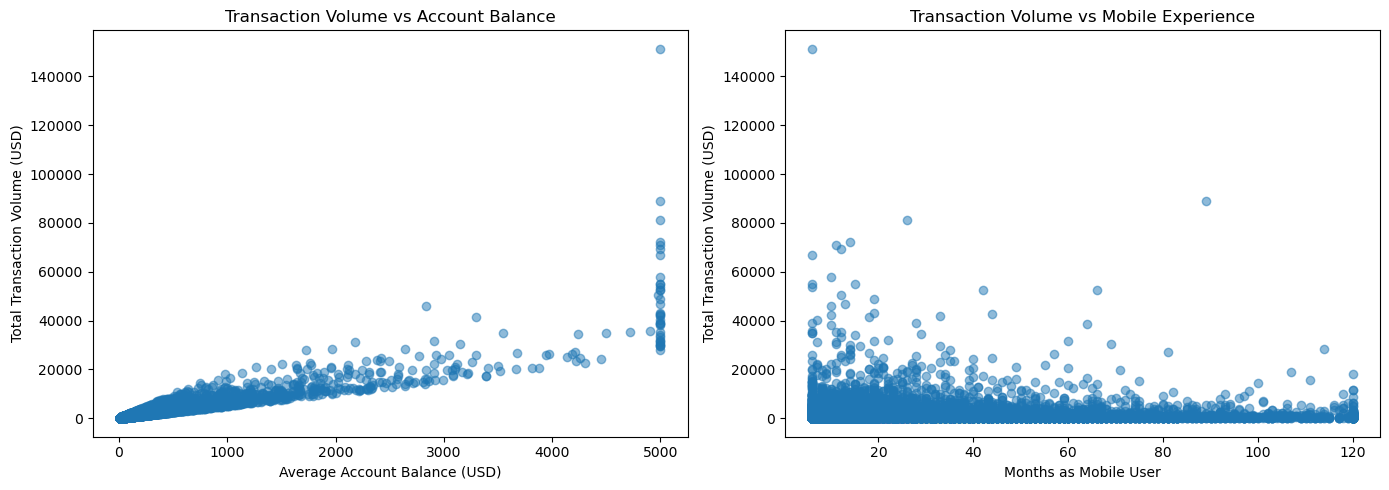

In [109]:
# Check which variable has stronger relationship
print("Correlations with total_transaction_volume_6_mon_usd:")
print(df[['total_transaction_volume_6mo_usd',
          'avg_account_balance_usd', 
          'months_as_mobile_user']].corr())

# Visualize relationships
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Transaction volume vs Account balance
axes[0].scatter(df['avg_account_balance_usd'], 
                df['total_transaction_volume_6mo_usd'], 
                alpha=0.5)
axes[0].set_xlabel('Average Account Balance (USD)')
axes[0].set_ylabel('Total Transaction Volume (USD)')
axes[0].set_title('Transaction Volume vs Account Balance')

# Plot 2: Transaction volume vs Mobile user months
axes[1].scatter(df['months_as_mobile_user'], 
                df['total_transaction_volume_6mo_usd'], 
                alpha=0.5)
axes[1].set_xlabel('Months as Mobile User')
axes[1].set_ylabel('Total Transaction Volume (USD)')
axes[1].set_title('Transaction Volume vs Mobile Experience')

plt.tight_layout()
plt.show()

In [117]:
df_filtered['ratio']=df_filtered['total_transaction_volume_6mo_usd']/df_filtered['avg_account_balance_usd']
median_ratio=df_filtered['ratio'].median()
median_ratio

C:\Users\User\AppData\Local\Temp\ipykernel_27248\2581319061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ratio']=df_filtered['total_transaction_volume_6mo_usd']/df_filtered['avg_account_balance_usd']


7.695552978917962

In [123]:
txn_nan = df_filtered['total_transaction_volume_6mo_usd'].isna()
balance_nan = df_filtered['avg_account_balance_usd'].isna()
# Check overlap
both_nan = txn_nan & balance_nan
only_txn_nan = txn_nan & ~balance_nan
only_balance_nan = ~txn_nan & balance_nan
neither_nan = ~txn_nan & ~balance_nan

if txn_nan.sum() > 0:
    overlap_pct = (both_nan.sum() / txn_nan.sum()) * 100
    print(f"\n🔗 {overlap_pct:.1f}% of transaction NaNs also have balance NaN")





🔗 100.0% of transaction NaNs also have balance NaN


In [124]:
# Identify rows where both are NaN
both_nan = (df_filtered['total_transaction_volume_6mo_usd'].isna() & 
            df_filtered['avg_account_balance_usd'].isna())

print(f"\nRows with both NaN: {both_nan.sum()}")

# Option 1: Use overall medians (simplest and safest)
overall_median_txn = df_filtered['total_transaction_volume_6mo_usd'].median()
overall_median_balance = df_filtered['avg_account_balance_usd'].median()
# Fill both columns
df_filtered.loc[both_nan, 'total_transaction_volume_6mo_usd'] = overall_median_txn
df_filtered.loc[both_nan, 'avg_account_balance_usd'] = overall_median_balance


Rows with both NaN: 4542


In [126]:
df_filtered=df_filtered.drop(columns='ratio')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'farm_size_acres'),
  Text(1, 0, 'distance_to_market_km'),
  Text(2, 0, 'distance_to_input_dealer_km'),
  Text(3, 0, 'previous_loan_repaid'),
  Text(4, 0, 'soil_moisture_index'),
  Text(5, 0, 'ndvi_current'),
  Text(6, 0, 'ndvi_historical_avg'),
  Text(7, 0, 'road_quality_score')])

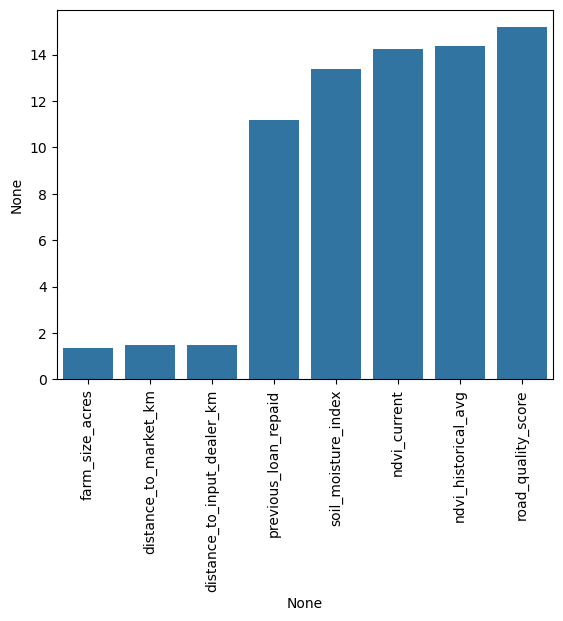

In [127]:
percent_nan=percent_missing(df_filtered)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [143]:
# Fill with median (same as mean in this case)
df_filtered['road_quality_score'] = df_filtered['road_quality_score'].fillna(4)

In [150]:
df_filtered[df_filtered['previous_loan_repaid']==1.0][['previous_loan_repaid','loan_default']]

,previous_loan_repaid,loan_default
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
19993,1.0,1.0
19994,1.0,1.0
19996,1.0,1.0
19998,1.0,1.0


In [151]:
nan_mask = df_filtered['previous_loan_repaid'].isna()

df_filtered.loc[nan_mask & (df_filtered['loan_default'] == 0), 'previous_loan_repaid'] = 1
df_filtered.loc[nan_mask & (df_filtered['loan_default'] == 1), 'previous_loan_repaid'] = 0

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'farm_size_acres'),
  Text(1, 0, 'distance_to_market_km'),
  Text(2, 0, 'distance_to_input_dealer_km'),
  Text(3, 0, 'soil_moisture_index'),
  Text(4, 0, 'ndvi_current'),
  Text(5, 0, 'ndvi_historical_avg')])

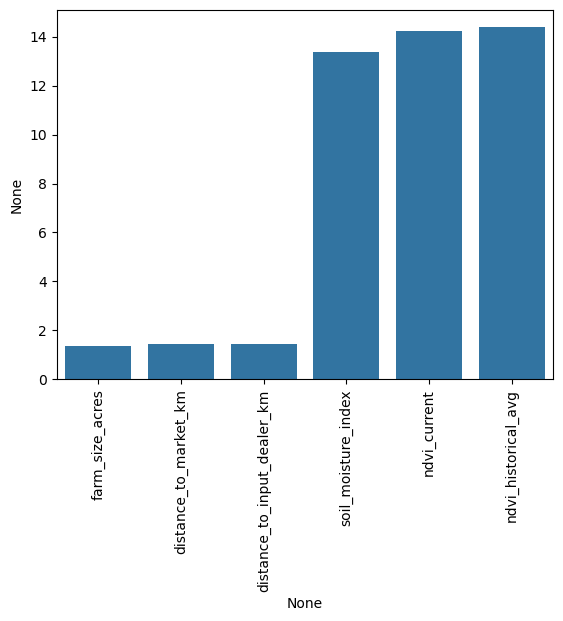

In [152]:
percent_nan=percent_missing(df_filtered)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

<Axes: xlabel='farm_size_acres', ylabel='Density'>

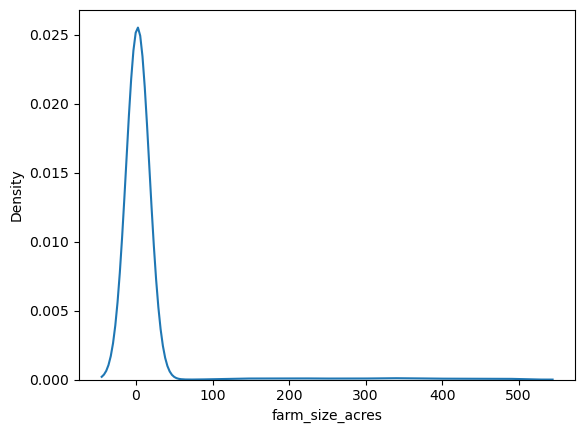

In [161]:
sns.kdeplot(data=df_filtered,x='farm_size_acres',bw_adjust=2)

In [157]:
df_filtered['farm_size_acres']=df_filtered['farm_size_acres'].fillna(df_filtered['farm_size_acres'].median())


<Axes: xlabel='distance_to_market_km', ylabel='Density'>

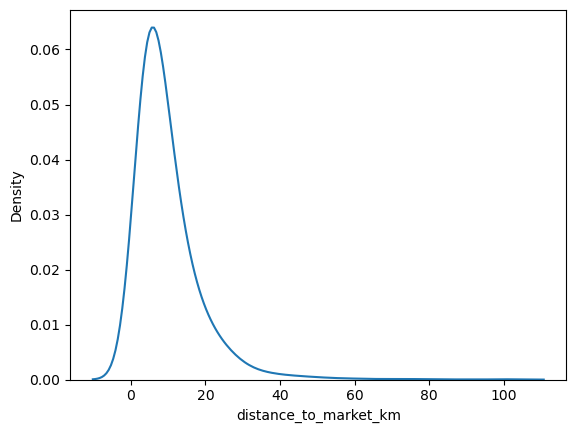

In [162]:
sns.kdeplot(data=df_filtered,x='distance_to_market_km',bw_adjust=3)

In [163]:
df_filtered['distance_to_market_km']=df_filtered['distance_to_market_km'].fillna(df_filtered['distance_to_market_km'].median())

([0, 1, 2, 3],
 [Text(0, 0, 'distance_to_input_dealer_km'),
  Text(1, 0, 'soil_moisture_index'),
  Text(2, 0, 'ndvi_current'),
  Text(3, 0, 'ndvi_historical_avg')])

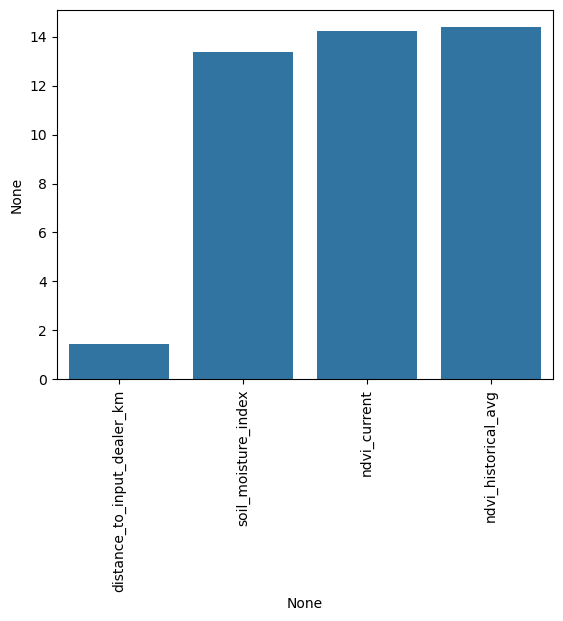

In [164]:
percent_nan=percent_missing(df_filtered)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

<Axes: xlabel='distance_to_market_km', ylabel='distance_to_input_dealer_km'>

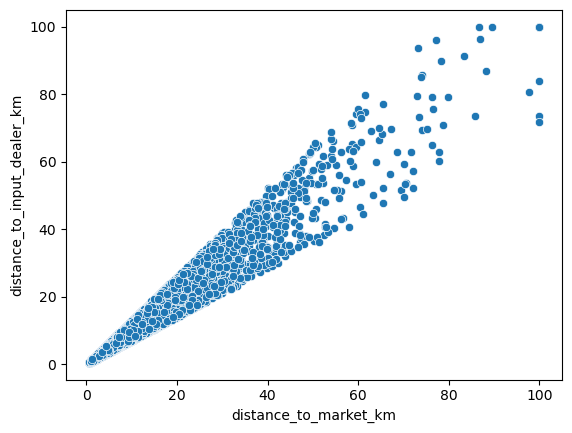

In [165]:
sns.scatterplot(data=df_filtered,x='distance_to_market_km',y='distance_to_input_dealer_km')

In [166]:
# Calculate ratio and fill in na
median_ratio = (df_filtered['distance_to_input_dealer_km'] / df_filtered['distance_to_market_km']).median()
df_filtered['distance_to_input_dealer_km'] = df_filtered['distance_to_input_dealer_km'].fillna(
    df_filtered['distance_to_market_km'] * median_ratio
)

In [170]:
df_filtered['soil_moisture_index'].describe()

count    17325.000000
mean         0.546939
std          0.184409
min          0.042040
25%          0.413915
50%          0.543483
75%          0.674824
max          1.000000
Name: soil_moisture_index, dtype: float64

<Axes: xlabel='soil_moisture_index', ylabel='Density'>

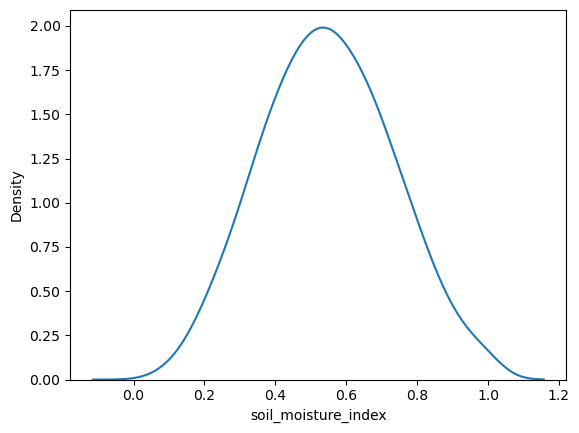

In [172]:
sns.kdeplot(data=df_filtered,x='soil_moisture_index',bw_adjust=2)
            

In [173]:
df_filtered['soil_moisture_index']=df_filtered['soil_moisture_index'].fillna(df_filtered['soil_moisture_index'].mean())

([0, 1], [Text(0, 0, 'ndvi_current'), Text(1, 0, 'ndvi_historical_avg')])

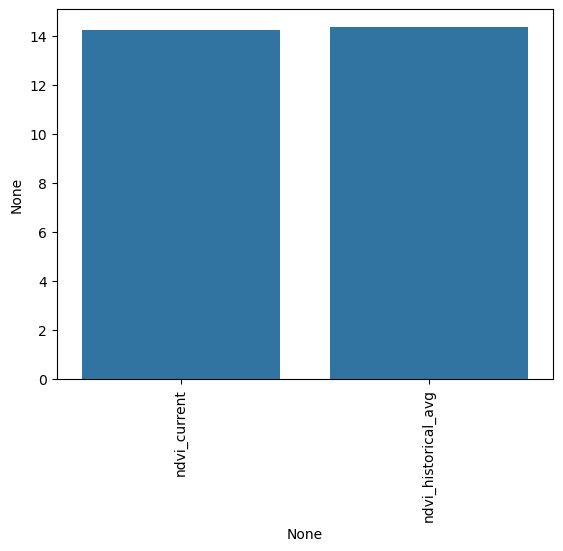

In [177]:
percent_nan=percent_missing(df_filtered)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)


<Axes: xlabel='ndvi_current', ylabel='default_probability'>

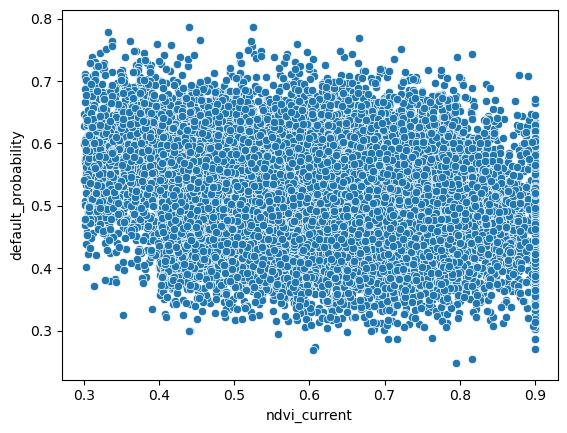

In [181]:
sns.scatterplot(data=df_filtered,x='ndvi_current',y='default_probability')

<Axes: xlabel='ndvi_historical_avg', ylabel='default_probability'>

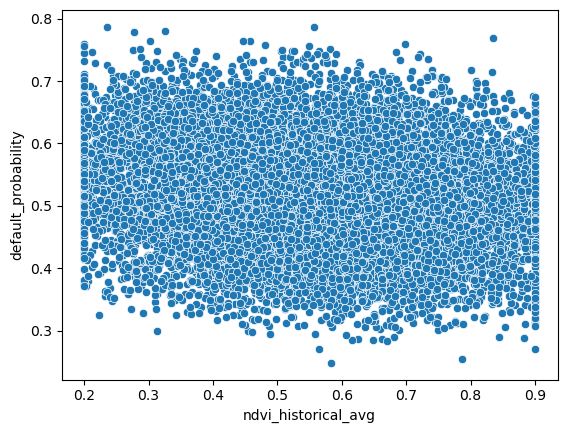

In [182]:
sns.scatterplot(data=df_filtered,x='ndvi_historical_avg',y='default_probability')

<Axes: xlabel='ndvi_current', ylabel='Density'>

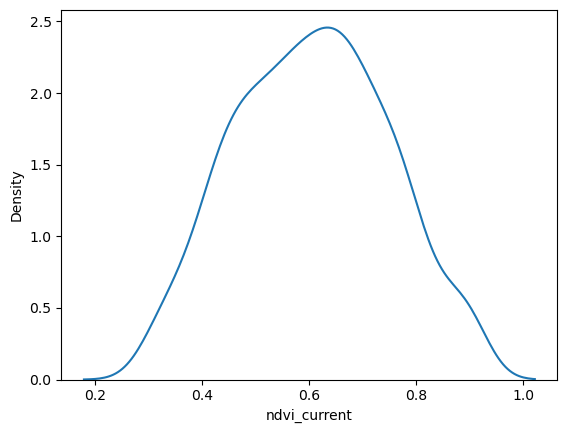

In [183]:
sns.kdeplot(data=df_filtered,x='ndvi_current',bw_adjust=2)

In [184]:
df_filtered['ndvi_current']=df_filtered['ndvi_current'].fillna(df_filtered['ndvi_current'].mean())

<Axes: xlabel='ndvi_historical_avg', ylabel='Density'>

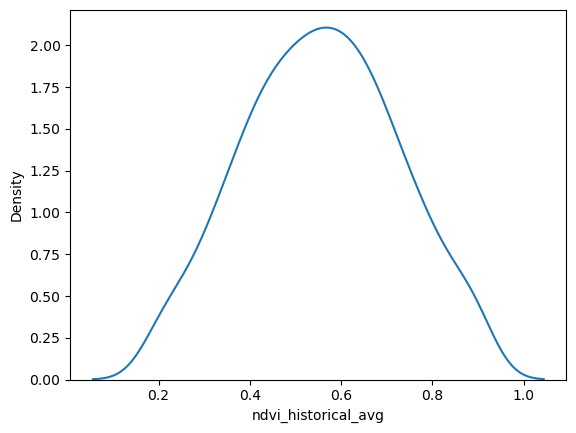

In [185]:
sns.kdeplot(data=df_filtered,x='ndvi_historical_avg',bw_adjust=2)

([0], [Text(0, 0, 'ndvi_historical_avg')])

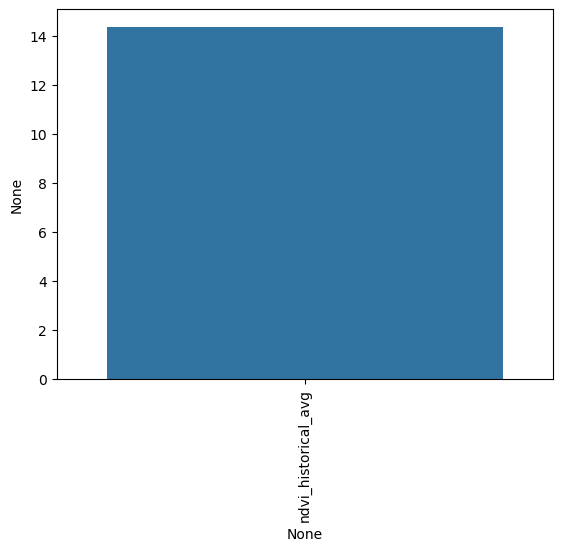

In [192]:
percent_nan=percent_missing(df_filtered)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90)

In [193]:
df_filtered['ndvi_historical_avg']=df_filtered['ndvi_historical_avg'].fillna(df_filtered['ndvi_historical_avg'].mean())

In [194]:
df_filtered.isnull().sum()

age                                 0
months_as_mobile_user               0
total_transaction_volume_6mo_usd    0
avg_account_balance_usd             0
has_mobile_savings                  0
previous_loan_repaid                0
bill_payment_consistency            0
farm_size_acres                     0
farming_experience_years            0
has_irrigation                      0
uses_improved_seeds                 0
previous_yield_bags                 0
has_off_farm_income                 0
cooperative_member                  0
has_buyer_contract                  0
ndvi_current                        0
ndvi_historical_avg                 0
soil_moisture_index                 0
distance_to_market_km               0
distance_to_input_dealer_km         0
road_quality_score                  0
available_references                0
has_trade_credit_history            0
has_crop_insurance                  0
years_in_location                   0
default_probability                 0
loan_default

In [195]:
df_filtered.select_dtypes(exclude='object')


,age,months_as_mobile_user,total_transaction_volume_6mo_usd,avg_account_balance_usd,has_mobile_savings,previous_loan_repaid,bill_payment_consistency,farm_size_acres,farming_experience_years,has_irrigation,...,soil_moisture_index,distance_to_market_km,distance_to_input_dealer_km,road_quality_score,available_references,has_trade_credit_history,has_crop_insurance,years_in_location,default_probability,loan_default
0,32.0,35.0,435.112927,51.089466,0.0,1.0,0.828169,1.001570,9.0,0.0,...,0.492096,4.019888,3.896178,4.0,0.0,0.0,0.0,4.0,0.461745,1.0
1,49.0,48.0,385.406231,34.625153,0.0,1.0,0.869560,0.885158,27.0,0.0,...,0.648953,11.683029,10.979913,4.0,3.0,0.0,0.0,22.0,0.597091,1.0
2,57.0,30.0,435.112927,51.089466,0.0,1.0,0.631529,2.035221,39.0,1.0,...,0.648023,6.564774,6.274066,4.0,5.0,0.0,1.0,33.0,0.387361,1.0
3,27.0,18.0,409.972202,55.607691,0.0,1.0,0.830230,11.327541,7.0,0.0,...,0.497552,17.873238,22.608760,4.0,6.0,0.0,0.0,1.0,0.574833,1.0
4,62.0,52.0,62.270760,9.193776,1.0,1.0,0.506168,1.905094,40.0,0.0,...,0.370138,17.146004,21.711497,4.0,5.0,0.0,0.0,55.0,0.488638,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,28.0,42.0,85.670530,9.290162,1.0,0.0,0.672482,0.915351,5.0,0.0,...,0.647778,9.312886,9.507603,4.0,5.0,1.0,1.0,6.0,0.532541,1.0
19996,38.0,27.0,435.112927,51.089466,0.0,1.0,0.807657,258.357053,13.0,0.0,...,0.428492,3.382753,3.707558,4.0,4.0,0.0,0.0,23.0,0.445689,1.0
19997,18.0,26.0,824.946662,80.139060,0.0,0.0,0.696577,222.161541,2.0,1.0,...,0.861445,10.731613,8.288546,5.0,1.0,0.0,0.0,1.0,0.645982,1.0
19998,40.0,26.0,408.854408,55.633698,0.0,1.0,0.763947,3.415551,23.0,0.0,...,0.641903,4.423238,5.575142,4.0,4.0,0.0,0.0,22.0,0.445204,1.0


In [197]:
final_df=df_filtered.to_csv('EA_Agriculture_data_final.csv')